Load the datset

In [3]:
#Load the dataset
import pandas as pd

# Load the parquet file
file_path = '/Users/akshu/career_counseling_system/Datasets/clean_data.parquet'
data = pd.read_parquet(file_path)

# Display the first few rows of the data
print(data.head())


                                           job_title  \
0  Computer Science Data Mining Engineering Machi...   
1  Agile AWS Azure Computer Science CX Engineerin...   
2  Consulting Director, Machine Learning/Computer...   
3                          Full Stack Developer (AI)   
4  Senior Principal Analyst, Artificial Intellige...   

                                            job_desc  
0             Career development Startup environment  
1             Career development Startup environment  
2  AWS Azure Classification Computer Science Comp...  
3  Angular Computer Science JavaScript Keras Mong...  
4    Consulting Excel Market research Research Spark  


Visualize

In [2]:
# Check the columns
print(data.columns)

# Check for missing values
print(data.isnull().sum())


Index(['job_title', 'job_desc'], dtype='object')
job_title      1
job_desc     116
dtype: int64


In [3]:
# Get a summary of the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415533 entries, 0 to 1415532
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   job_title  1415532 non-null  object
 1   job_desc   1415417 non-null  object
dtypes: object(2)
memory usage: 21.6+ MB
None


In [4]:
# Unique job titles
print(data['job_title'].unique())

# Unique job descriptions
print(data['job_desc'].unique())


['Computer Science Data Mining Engineering Machine Learning Mathematics Model deployment +7'
 'Agile AWS Azure Computer Science CX Engineering +7'
 'Consulting Director, Machine Learning/Computer Vision' ...
 'Tech Lead / POD Lead' 'Java Full Stack Developer - Hibernate / Spring'
 'Tech Lead - Azure']
['Career development Startup environment'
 'AWS Azure Classification Computer Science Computer Vision Consulting +10'
 'Angular Computer Science JavaScript Keras MongoDB NoSQL +6' ...
 'AirFlow, BigQuery, GCS, Kafka, Java, Shell script, RDBMS, Python'
 'PowerShell, Azure Data Factory, Azure, PaaS, MDM, SaaS, IaaS, Azure Data Lake'
 'Java, JavaScript, Machine Learning, NoSQL, Cloud Computing, Full Stack, AWS, SQL']


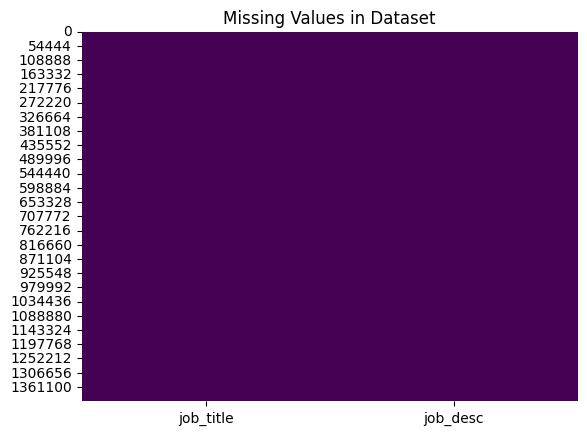

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()


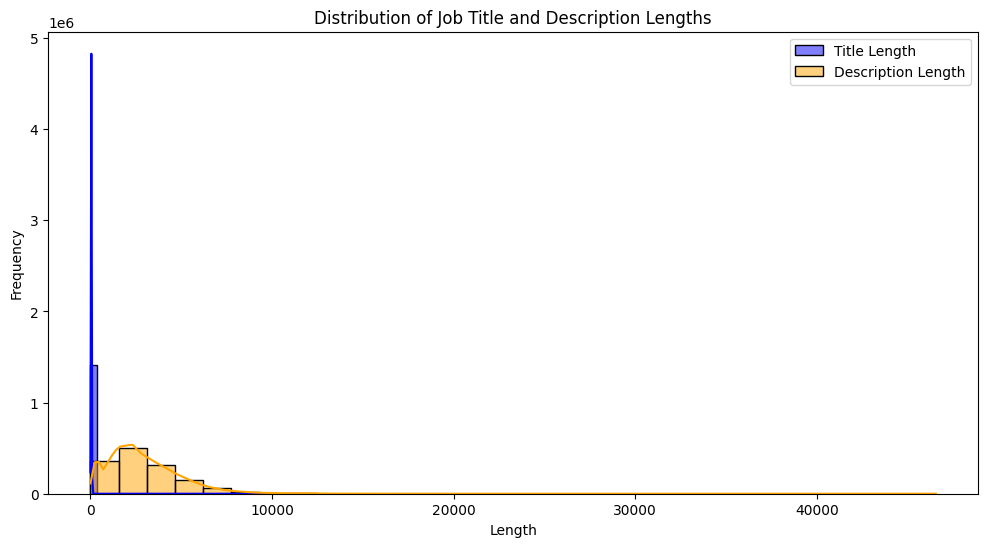

In [7]:
# Add a new column for the length of job titles and descriptions
data['title_length'] = data['job_title'].str.len()  # Use str.len() instead of apply(len)
data['desc_length'] = data['job_desc'].str.len()    # Use str.len() instead of apply(len)

# Visualize the distribution of lengths
plt.figure(figsize=(12, 6))
sns.histplot(data['title_length'], bins=30, kde=True, color='blue', label='Title Length')
sns.histplot(data['desc_length'], bins=30, kde=True, color='orange', label='Description Length')
plt.legend()
plt.title('Distribution of Job Title and Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from wordcloud import WordCloud

# Create a word cloud for job titles
wordcloud_titles = WordCloud(width=800, height=400).generate(' '.join(data['job_title'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Titles')
plt.show()

# Create a word cloud for job descriptions
wordcloud_desc = WordCloud(width=800, height=400).generate(' '.join(data['job_desc'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()


In [ ]:
from collections import Counter
import re

# Function to clean and split the text
def get_most_common_words(text_series):
    text = ' '.join(text_series.dropna())
    words = re.findall(r'\w+', text.lower())
    return Counter(words).most_common(10)

# Get most common words in job descriptions
common_words_desc = get_most_common_words(data['job_desc'])
print(common_words_desc)


In [4]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Add columns
table.field_names = data.columns.tolist()

# Add a limited number of rows (e.g., 5)
for index, row in data.iterrows():
    table.add_row(row)
    if index == 4:  # Stop after adding 5 rows
        break

# Print the table
print(table)


+-------------------------------------------------------------------------------------------+--------------------------------------------------------------------------+
|                                         job_title                                         |                                 job_desc                                 |
+-------------------------------------------------------------------------------------------+--------------------------------------------------------------------------+
| Computer Science Data Mining Engineering Machine Learning Mathematics Model deployment +7 |                  Career development Startup environment                  |
|                     Agile AWS Azure Computer Science CX Engineering +7                    |                  Career development Startup environment                  |
|                   Consulting Director, Machine Learning/Computer Vision                   | AWS Azure Classification Computer Science Computer Vision Con

: 